Please enter the rule for the CA (integer from 0 to 255):
69
Enter the width of the graph (an odd number please):
111
Answer 0 to start with the standard state or 1 to randonly generate one:
0
Please enter the number of iterations (an integer, ideally bigger than 55.0):
111


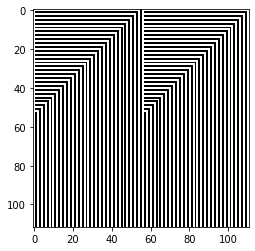

In [9]:
## Cellular Automata with fixed boundary conditions

import numpy as np
import random as rd
import matplotlib.pyplot as plt
%matplotlib inline


def dec_to_bin(x):
    return bin(x)[2:]


print("Please enter the rule for the CA (integer from 0 to 255):")
rule = dec_to_bin(int(input()))
while len(rule) < 8:
    rule = "0"+rule
# print(rule)
# print(type(rule))

def generate(a, b, c, rule):  ## Function that determines the evolution
#     print(a,b,c)
    if a == 0 and b == 0 and c == 0:
        return int(rule[7])
    if a == 0 and b == 0 and c == 1:
        return int(rule[6])
    if a == 0 and b == 1 and c == 0:
        return int(rule[5])
    if a == 0 and b == 1 and c == 1:
        return int(rule[4])
    if a == 1 and b == 0 and c == 0:
        return int(rule[3])
    if a == 1 and b == 0 and c == 1:
        return int(rule[2])
    if a == 1 and b == 1 and c == 0:
        return int(rule[1])
    if a == 1 and b == 1 and c == 1:
        return int(rule[0])


print("Enter the width of the graph (an odd number please):")
N = int(input())
N -= 1
if N%2 != 0:   ## Correcting an odd number to an even number (we use even because numpy arrays start at 0)
    N += 1
#     print("Activated,", N)

print("Answer 0 to start with the standard state or 1 to randonly generate one:")
answer = int(input())
if answer == 0:
    T = np.zeros(N+1)
    T[N//2] = 1
if answer == 1:
    T = np.zeros(N+1)
    l = 0
    while l <= (len(T)-1):
        T[l] = rd.randint(0,1)
        l += 1
T_1 = np.zeros(N+1)
# print(N)
# print(type(N//2))
# print(T)
# print(len(T))

evolution = np.array([T])
t = 1
print("Please enter the number of iterations (an integer, ideally bigger than "+str(N/2)+"):")
TIME = int(input())

while t <= TIME:
    i = 1
    while i < (len(T)-1):
#         print(T[i-1],T[i],T[i+1])
        T_1[i] = generate(T[i-1], T[i], T[i+1], rule)
#         print(T[i-1],T[i],T[i+1])
#         print(rule)
        i += 1
    evolution = np.vstack((evolution,T_1))
#     print(T,T_1)
    T[:] = T_1
#     print(T,T_1)
    t += 1
    
# print(evolution)
plt.imshow(evolution, cmap='Greys',  interpolation='nearest')
plt.show()

Please enter the rule for the CA (integer from 0 to 255):
113
Answer 0 to start with the standard state or 1 to randonly generate one:
1
Enter the width of the graph (an odd number please):
111
Please enter the number of iterations (an integer, ideally bigger than 55.0):
111


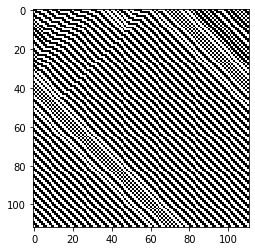

In [97]:
## Cellular Automata with ring structured boundary conditions

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


def dec_to_bin(x):
    return bin(x)[2:]


print("Please enter the rule for the CA (integer from 0 to 255):")
rule = dec_to_bin(int(input()))
while len(rule) < 8:
    rule = "0"+rule
# print(rule)
# print(type(rule))

def generate(a, b, c, rule):  ## Function that determines the evolution
#     print(a,b,c)
    if a == 0 and b == 0 and c == 0:
        return int(rule[7])
    if a == 0 and b == 0 and c == 1:
        return int(rule[6])
    if a == 0 and b == 1 and c == 0:
        return int(rule[5])
    if a == 0 and b == 1 and c == 1:
        return int(rule[4])
    if a == 1 and b == 0 and c == 0:
        return int(rule[3])
    if a == 1 and b == 0 and c == 1:
        return int(rule[2])
    if a == 1 and b == 1 and c == 0:
        return int(rule[1])
    if a == 1 and b == 1 and c == 1:
        return int(rule[0])
    

print("Answer 0 to start with the standard state or 1 to randonly generate one:")
answer = int(input())
if answer == 0:
    T = np.zeros(N+1)
    T[N//2] = 1
if answer == 1:
    T = np.zeros(N+1)
    l = 0
    while l <= (len(T)-1):
        T[l] = rd.randint(0,1)
        l += 1
T_1 = np.zeros(N+1)
# print(N)
# print(type(N//2))
# print(T)
# print(len(T))
    
print("Enter the width of the graph (an odd number please):")
N = int(input())
N -= 1
if N%2 != 0:   ## Correcting an odd number to an even number (we use even because numpy arrays start at 0)
    N += 1

evolution = np.array([T])
t = 1
print("Please enter the number of iterations (an integer, ideally bigger than "+str(N/2)+"):")
TIME = int(input())

while t <= TIME:
    i = 0
    while i <= (len(T)-1):
        if i == 0:
            T_1[i] = generate(T[(len(T)-1)], T[i], T[i+1], rule)
        if i == (len(T)-1):
            T_1[i] = generate(T[i-1], T[i], T[0], rule)
#         print(T[i-1],T[i],T[i+1])
        if i != 0 and i != (len(T)-1):
            T_1[i] = generate(T[i-1], T[i], T[i+1], rule)
#         print(T[i-1],T[i],T[i+1])
#         print(rule)
        i += 1
    evolution = np.vstack((evolution,T_1))
#     print(T,T_1)
    T[:] = T_1
#     print(T,T_1)
    t += 1
    
# print(evolution)
plt.imshow(evolution, cmap='Greys',  interpolation='nearest')
plt.show()